In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
#Creating data points
X, y = make_classification(n_samples = 50000, n_features = 15, n_informative = 10, n_redundant = 5, n_classes = 2, weights = [0.7], class_sep = 0.7, random_state = 15)

In [3]:
print(X.shape, y.shape)

(50000, 15) (50000,)


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
#Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(37500, 15) (37500,) (12500, 15) (12500,)


In [7]:
w = np.zeros_like(X_train[0]) #Initializing weight vector
b = 0  #Initializing intercept

In [8]:
N = len(X_train)
learning_rate = 0.0001  #learning rate
reg_constant = 0.0001   #regularization constant
tol = 1e-3              #The stopping criterion

In [9]:
def log_loss(X_data, y_data, weight, intercept):
    '''
    This function computes the log loss
    '''
    log_loss = 0
    for i in range(0, len(X_data)):
        log_loss += (y_data[i] * np.log10(sigmoid(weight, X_data[i], intercept)) + (1 - y_data[i]) * np.log10(1 - sigmoid(weight, X_data[i], intercept)))
    return -(log_loss) / len(X_data)

In [10]:
def sigmoid(weight, data_point, intercept):
    '''
    This function computes the sigmoid(x)
    '''
    return 1 / (1 + np.exp(-(np.dot(weight, data_point) + intercept)))

In [11]:
import random
def update_using_gradient_descent(X_train, y_train, old_weight, old_intercept):
    '''
    This function updates weight and intercept using gradient descent, and computes train and test losses
    '''
    train_loss = []
    test_loss = []
    epoch_count = 0
    
    #curr_loss = log_loss(X_train, y_train, old_weight, old_intercept)  #Computing log loss for the train data point
    #train_loss.append(curr_loss)
    #test_loss.append(log_loss(X_test, y_test, old_weight, old_intercept)) #Computing log loss for the test data point 
    weight = old_weight
    intercept = old_intercept
    curr_loss = 0
    for j in range(0, 2):
        prev_loss = curr_loss
        for i in range(len(X_train)):
            #Updating weight
            updated_weight = (1 - (learning_rate * reg_constant) / N) * weight + reg_constant * X_train[i] * (y_train[i] - sigmoid(weight, X_train[i], intercept))
            #Updating intercept
            updated_intercept = intercept + reg_constant * (y_train[i] - sigmoid(weight, X_train[i], intercept))
            #Computing log loss for the train data point
            weight = updated_weight
            intercept = updated_intercept 
        curr_loss = log_loss(X_train, y_train, weight, intercept)
        train_loss.append(curr_loss)
        #Computing log loss for the test data point
        test_loss.append(log_loss(X_test, y_test, weight, intercept))
        epoch_count += 1
    
    while(prev_loss - curr_loss > tol):
        prev_loss = curr_loss
        for i in range(len(X_train)):
            #Updating weight
            updated_weight = (1 - (learning_rate * reg_constant) / N) * weight + reg_constant * X_train[i] * (y_train[i] - sigmoid(weight, X_train[i], intercept))
            #Updating intercept
            updated_intercept = intercept + reg_constant * (y_train[i] - sigmoid(weight, X_train[i], intercept))
            #Computing log loss for the train data point
            weight = updated_weight
            intercept = updated_intercept 
        curr_loss = log_loss(X_train, y_train, weight, intercept)
        train_loss.append(curr_loss)
        #Computing log loss for the test data point
        test_loss.append(log_loss(X_test, y_test, weight, intercept))
        epoch_count += 1
        
    return train_loss, test_loss, weight, intercept, epoch_count

In [12]:
train_loss, test_loss, new_weight, new_intercept, epoch = update_using_gradient_descent(X_train, y_train, w, b)

In [13]:
print(train_loss)
print(test_loss)
print(new_weight)
print(new_intercept)
print(epoch)

[0.17545748442854878, 0.1686715705033325, 0.1663916799246301, 0.1653682753740316, 0.1648570745954716]
[0.17595474423213966, 0.16939931358951177, 0.16720591194885903, 0.16621717799334929, 0.1657195946397841]
[-0.40001239  0.18328928 -0.13402217  0.33580319 -0.17889152  0.54558313
 -0.4466899  -0.09723511  0.20465463  0.15485885  0.18269707  0.01098364
 -0.06612384  0.33709558  0.02007051]
-0.718422609298153
5


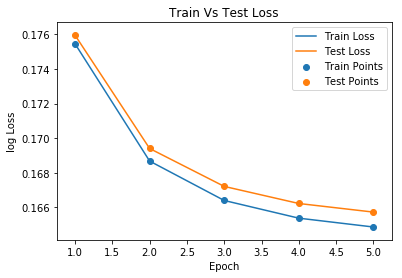

In [15]:
import matplotlib.pyplot as plt
epochs = list(range(1, epoch + 1))
plt.plot(epochs, train_loss, label = 'Train Loss')
plt.plot(epochs, test_loss, label = 'Test Loss')
plt.scatter(epochs, train_loss, label = 'Train Points')
plt.scatter(epochs, test_loss, label = 'Test Points')
plt.xlabel('Epoch')
plt.ylabel('log Loss')
plt.title('Train Vs Test Loss')
plt.legend()
plt.show()

In [16]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [17]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.06 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.07 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.08 seconds.
Convergence after 6 epochs took 0.08 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [18]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
          0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
          0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]]),
 (1, 15),
 array([-0.76181561]))

In [19]:
new_weight - clf.coef_, new_intercept - clf.intercept_

(array([[ 1.17619247e-02, -8.78541301e-04,  4.92855846e-03,
          7.80752407e-05,  5.34085182e-03, -3.85207210e-03,
          5.44702177e-03, -8.66045608e-03, -1.07119764e-02,
         -1.86587241e-02, -2.11120186e-03,  6.54901415e-03,
          4.20616355e-03,  2.63771503e-04,  2.92174301e-05]]),
 array([0.043393]))

In [20]:
def pred(weight,intercept, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(weight, X[i], intercept) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(new_weight,new_intercept,X_train)) / len(X_train))
print(1-np.sum(y_test  - pred(new_weight,new_intercept,X_test)) / len(X_test))

0.96512
0.96272
